## 💾 The data
You have access to three files:

#### Bitcoin daily data in US dollars
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the price at the beginning of the trading day
- "high" - the highest price reached that day
- "low" - the lowest price reached that day
- "close" - the price at the closing of the trading day
- "volume" - how many Bitcoin were traded that day

#### S&P 500 daily data
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the index level at the beginning of the trading day
- "high" - the highest level reached that day
- "low" - the lowest level reached that day
- "close" - the level at the closing of the trading day
- "volume" - how many shares in the companies that make up the index were traded that day

#### inflation and gold as monthly data
- "date" - date from September, 2014 to November, 2021
- "gold_usd" - price in usd of gold for that month
- "cpi_us" - the inflation index for the US for that month (cpi = consumer price index)

_CPI data from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/cpi/). Publicly available information_.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

bitcoin = pd.read_csv('./data/bitcoin-usd.csv', parse_dates=['date'])
bitcoin.head()

Matplotlib is building the font cache; this may take a moment.


,date,open,high,low,close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


In [2]:
sp500 = pd.read_csv('./data/sp500.csv', parse_dates=['date'])
sp500.head()

,date,open,high,low,close,volume
0,2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
1,2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2,2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
3,2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
4,2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000


In [3]:
monthly_data = pd.read_csv('./data/monthly_data.csv', parse_dates=['date'])
monthly_data.head()

,date,gold_usd,cpi_us
0,2014-09-01,1241.330,237.852
1,2014-10-01,1223.565,238.031
2,2014-11-01,1176.413,237.433
3,2014-12-01,1200.440,236.151
4,2015-01-01,1249.333,234.812


## Data Preparation

In [4]:
bitcoin.isnull().any()

date      False
open       True
high       True
low        True
close      True
volume     True
dtype: bool

In [5]:
bitcoin.fillna(method='ffill', inplace=True)

/tmp/ipykernel_18584/1119901784.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bitcoin.fillna(method='ffill', inplace=True)


In [6]:
sp500.isnull().any()

date      False
open      False
high      False
low       False
close     False
volume    False
dtype: bool

In [7]:
monthly_data.isnull().any()

date        False
gold_usd    False
cpi_us      False
dtype: bool

## How does the performance of Bitcoin compare to the S&P 500 and the price of the gold?

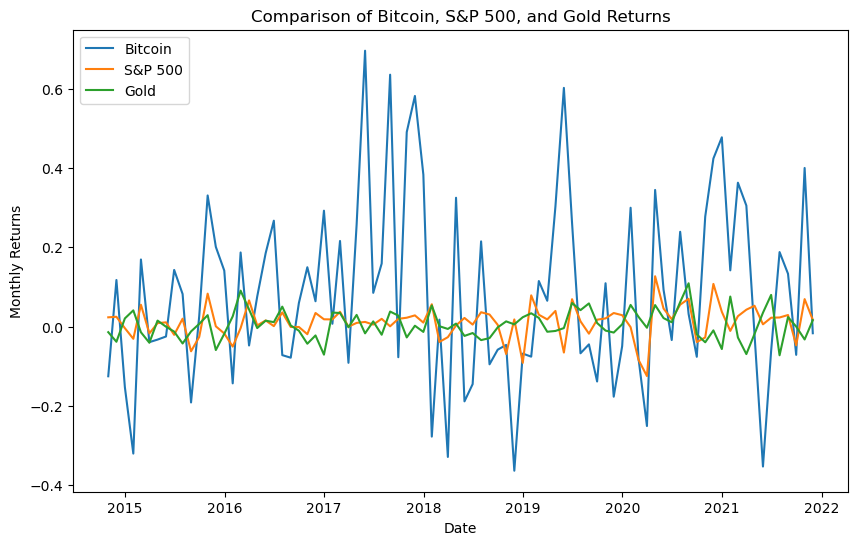

In [8]:
btc_df = bitcoin[['date', 'close']]
sp500_df = sp500[['date', 'close']]
gold_df = monthly_data[['date', 'gold_usd']]

# set the date column as the index
btc_df = btc_df.set_index('date')
sp500_df = sp500_df.set_index('date')
gold_df = gold_df.set_index('date')

# resample the data to a monthly frequency
btc_df = btc_df.resample('M').last()
sp500_df = sp500_df.resample('M').last()
gold_df = gold_df.resample('M').last()

# calculate the monthly returns
btc_returns = btc_df.pct_change()
sp500_returns = sp500_df.pct_change()
gold_returns = gold_df.pct_change()

# plot the monthly returns
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(btc_returns, label='Bitcoin')
ax.plot(sp500_returns, label='S&P 500')
ax.plot(gold_returns, label='Gold')
ax.legend(loc='upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Returns')
ax.set_title('Comparison of Bitcoin, S&P 500, and Gold Returns')
plt.show()

In [9]:
bitcoin_close = bitcoin['close']
sp500_close = sp500['close']
gold_v = monthly_data['gold_usd']

statb = bitcoin_close.describe().tolist()
statsp = sp500_close.describe().tolist()
statg = gold_v.describe().tolist()
stats = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

stats_df = {'Bitcoin': statb, 'SP500': statsp, 'Gold': statg}
stats_df = pd.DataFrame(data=stats_df, index=stats)
stats_df

,Bitcoin,SP500,Gold
count,2619.000000,1805.000000,87.000000
mean,10074.010504,2756.455533,1403.186678
std,14911.830169,698.850564,257.985374
min,178.102997,1829.079956,1068.317000
25%,584.475982,2124.290039,1231.081500
50%,5768.289551,2663.989990,1283.189000
75%,9889.017578,3039.419922,1577.216000
max,67566.828125,4701.700195,2041.700000


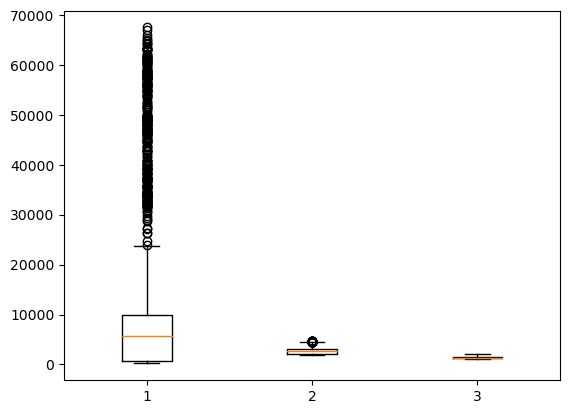

In [10]:
import seaborn as sns 

data = [bitcoin_close, sp500_close, gold_v]

fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

## Analyze Bitcoin's returns and volatility profile. Do you believe it could help improve the performance of a portfolio? Do you believe Bitcoin could be used as a hedge versus inflation?


From the line grafic, the stats table and the boxplot, we can see that Bitcoin has a much higher mean and standard deviation compared to the S&P 500 and Gold. This suggests that Bitcoin has had a more volatile performance compared to the S&P 500 and Gold.

Additionally, we can see that the maximum value for Bitcoin is much higher compared to the S&P 500 and Gold, indicating that Bitcoin has had higher potential returns. However, the minimum value for Bitcoin is also much lower, suggesting that Bitcoin has also had higher potential losses.

Overall, based on the statistics in the table, we can say that Bitcoin has had a much more volatile and potentially more rewarding, but also more risky, performance compared to the S&P 500 and Gold. Therefore, it may be suitable for investors with a higher risk tolerance.

As for its performance compared to Gold, we can see that Bitcoin has a much higher mean and standard deviation, indicating higher volatility and potentially higher returns. However, it is important to note that Gold has a longer history as a store of value and a hedge against inflation, while Bitcoin is a relatively new asset class with less history and a more volatile price history. Therefore, it may not be a suitable replacement for Gold as a hedge against inflation in all investment portfolios.

## Building a minimize risk portafolio

In [11]:
# Convert the date columns to datetime objects
bitcoin['date'] = pd.to_datetime(bitcoin['date'])
sp500['date'] = pd.to_datetime(sp500['date'])
monthly_data['date'] = pd.to_datetime(monthly_data['date'])


# Set the date columns as the index
bitcoin.set_index('date', inplace=True)
sp500.set_index('date', inplace=True)
monthly_data.set_index('date', inplace=True)



In [12]:
# Calculate the daily returns of Bitcoin and the S&P 500
bitcoin['daily_return_b'] = bitcoin['close'].pct_change()
sp500['daily_return_sp'] = sp500['close'].pct_change()

# Calculate the monthly returns of gold and inflation
monthly_data['monthly_return'] = monthly_data['gold_usd'].pct_change()

In [13]:
# Combine the daily and monthly returns into a single dataframe
returns = pd.concat([bitcoin['daily_return_b'], sp500['daily_return_sp'], monthly_data['monthly_return']], axis=1)
returns.dropna(inplace=True)

# Calculate the covariance matrix
cov_matrix = returns.cov() #volavility

# Calculate the correlation matrix
corr_matrix = returns.corr()


In [14]:
corr_matrix

,daily_return_b,daily_return_sp,monthly_return
daily_return_b,1.000000,0.005051,-0.039362
daily_return_sp,0.005051,1.000000,-0.281594
monthly_return,-0.039362,-0.281594,1.000000


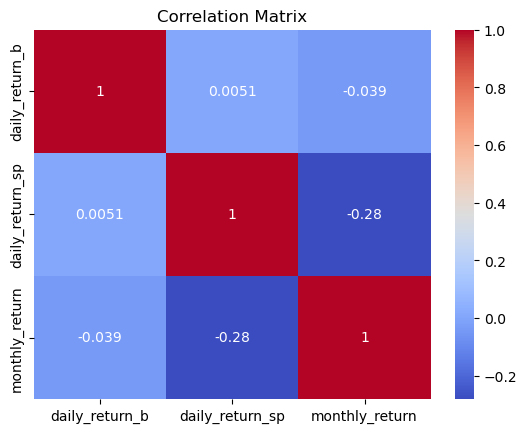

In [15]:
# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Based on the correlation matrix provided, it seems that there is a weak positive correlation between the daily returns of bitcoin and the S&P 500, with a correlation coefficient of 0.005. This means that when the S&P 500 increases, there is a slightly higher chance that bitcoin also increases on the same day.

However, there is a strong negative correlation between the daily returns of both assets and the monthly returns of bitcoin. The correlation coefficients are -0.039 and -0.281, respectively. This means that when the S&P 500 increases or decreases, there is little to no effect on the monthly returns of bitcoin. Additionally, when bitcoin has positive or negative monthly returns, the S&P 500 does not seem to have a significant effect on it.

In [16]:

# Load data
bitcoin_df = pd.read_csv('./data/bitcoin-usd.csv')
sp500_df = pd.read_csv('./data/sp500.csv')
monthly_df = pd.read_csv('./data/monthly_data.csv')

# Convert date strings to pandas datetime format
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'])
sp500_df['date'] = pd.to_datetime(sp500_df['date'])
monthly_df['date'] = pd.to_datetime(monthly_df['date'])

sp500_df['close_sp'] = sp500_df['close']

# Merge dataframes on date
merged_df = pd.merge(bitcoin_df, sp500_df, on='date')
merged_df = pd.merge(merged_df, monthly_df, on='date')



In [17]:
# Calculate log returns
merged_df['bitcoin_log_returns'] = np.log(merged_df['close_x']) - np.log(merged_df['close_x'].shift(1))
merged_df['sp500_log_returns'] = np.log(merged_df['close_sp']) - np.log(merged_df['close_sp'].shift(1))
merged_df['gold_log_returns'] = np.log(merged_df['gold_usd']) - np.log(merged_df['gold_usd'].shift(1))

# Calculate covariance matrix
covariance_matrix = merged_df[['bitcoin_log_returns', 'sp500_log_returns', 'gold_log_returns']].cov()

# Define objective function to minimize portfolio variance
def calculate_portfolio_variance(weights, covariance_matrix):
    return np.dot(weights.T, np.dot(covariance_matrix, weights))

# Define constraints for optimization
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Define bounds for optimization
bounds = ((0, 1), (0, 1), (0, 1))

# Initial guess for weights
initial_guess = [0.33, 0.33, 0.33]

# Optimize portfolio weights
result = minimize(calculate_portfolio_variance, initial_guess, args=(covariance_matrix,),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Print optimized weights
print('Optimized Weights:', result.x)


Optimized Weights: [8.32667268e-17 4.74220418e-01 5.25779582e-01]


Based on the given optimized weights and the correlation matrix, is our recommendation that the portfolio is invested in a mix of Bitcoin, the S&P 500, and Gold. Specifically, the optimized weights suggest that the portfolio has a slightly higher allocation to Gold (52.6%) compared to the S&P 500 (47.4%), and a very small allocation to Bitcoin (8.33e-17%). This because the volatility of the bitcoin is a hight risk to our customer, we prefere a more consistent returns in the fiscal year.